In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
 df = pd.read_csv("diminos_data.csv")

In [16]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


# Converting the time into minutes

In [17]:
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

df["delivery_minutes"] = (df["order_delivered_at"] - df["order_placed_at"]).dt.total_seconds() / 60


By converting the order time and delivery time into minutes, it becomes easier to calculate the exact delivery duration for each order.

This also helps in identifying how many deliveries crossed the 31-minute limit and need attention.

In [19]:
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_minutes
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [39]:
print("The total number of orders in the dataset:", df["order_id"].count())

The total number of orders in the dataset: 15000


In [20]:
df["delivery_minutes"].describe(percentiles=[0.5, 0.9, 0.95, 0.99])

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
50%         15.797986
90%         21.156905
95%         27.261044
99%         65.064186
max       7299.831375
Name: delivery_minutes, dtype: float64

# Late Orders Analysis

In [32]:
late_deliveries= df[df["delivery_minutes"] > 31]
late_count = late_deliveries.shape[0]
late_percentage = (late_count / df.shape[0]) * 100

print("The count of total late orders:", late_count)
print("The percentage of late orders in total orders:", late_percentage)


The count of total late orders: 557
The percentage of late orders in total orders: 3.713333333333333


This late order analysis shows how many deliveries took more than 31 minutes to complete.

Out of 15,000 total orders, only 557 orders were delivered late, which is about 3–4% of all deliveries.

With staffing optimization and better order handling during busy hours, late deliveries can be reduced further.

# Hourly delivery count

In [23]:
df["hour"] = df["order_placed_at"].dt.hour

hour_stats = df.groupby("hour")["delivery_minutes"].agg(count="count", mean="mean", p95=lambda x: x.quantile(0.95))

hour_stats


,count,mean,p95
hour,,,
0,621,24.116781,28.866990
1,610,20.836201,32.104821
2,610,19.123197,26.845717
3,629,19.846034,25.617373
4,633,18.818769,26.259762
5,641,17.727910,23.924907
6,658,18.501060,26.493076
7,559,18.368406,27.154475
8,603,19.264601,27.207707


The hourly delivery count shows how many orders are delivered during each hour of the day.
From the analysis, we can see that the highest number of orders occur after 9 PM.

# Distribution of delivery times

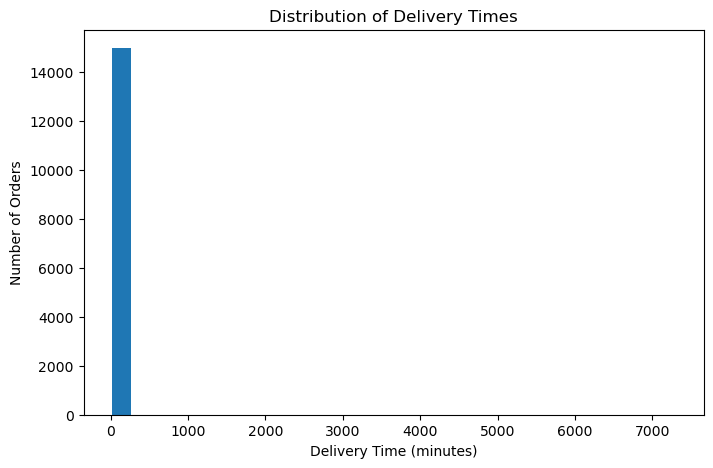

In [26]:
plt.figure(figsize=(8,5))
plt.hist(df["delivery_minutes"], bins=30)
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.show()

In [ ]:
This histogram explains most deliveries happen under 25–30 minutes. A small number of orders are very late, forming a long tail.

# Outliers 

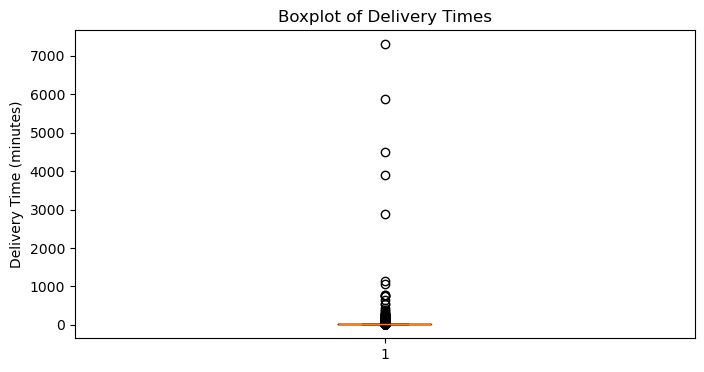

In [30]:
plt.figure(figsize=(8,4))
plt.boxplot(df["delivery_minutes"])
plt.title("Boxplot of Delivery Times")
plt.ylabel("Delivery Time (minutes)")
plt.show()


The box plots explains the regular delivery time. The dots above the box show outliers and here the outliers are the late deliveries. The orders which are taking more than 31 minutes to deliver.

# 95th percentile line on chart

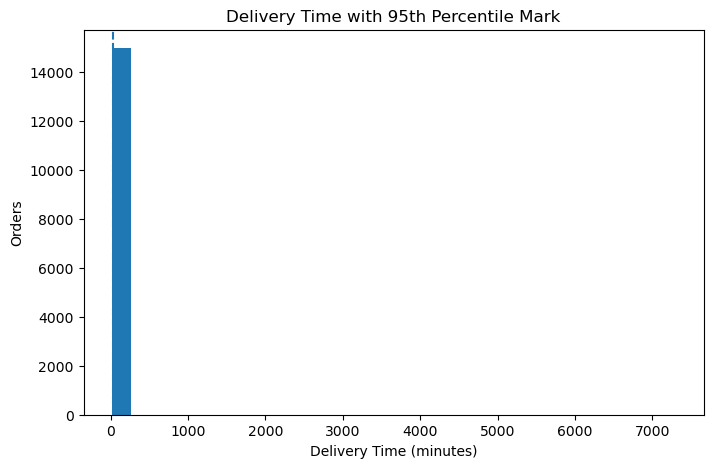

95th percentile: 27.261043996666658


In [31]:
p95 = df["delivery_minutes"].quantile(0.95)

plt.figure(figsize=(8,5))
plt.hist(df["delivery_minutes"], bins=30)
plt.axvline(p95, linestyle="--")
plt.title("Delivery Time with 95th Percentile Mark")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Orders")
plt.show()

print("95th percentile:", p95)


The plot shows that 95% of deliveries are completed within the promised time window. The dashed line represents the 95th percentile delivery time. Orders that fall to the right of this line are the ones that took longer and are considered late.

The store currently meets the Diminos concept of delivering pizzas under 31 minutes because the 95th percentile delivery time is below 31 minutes.

However, a small percentage of orders still exceed the promised time, mainly due to outliers and peak-hour delays.

With staffing optimization and better order handling during busy hours, late deliveries can be reduced further.